Dữ liệu mẫu: X (min=0.0, max=100.0)
Đang training với Adam...


C:\Users\Admin\PycharmProjects\PythonProject1\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



results
Công thức gốc:      y = 0.5x + 2.0
Model dự đoán:      y = 0.5063x + 1.8612


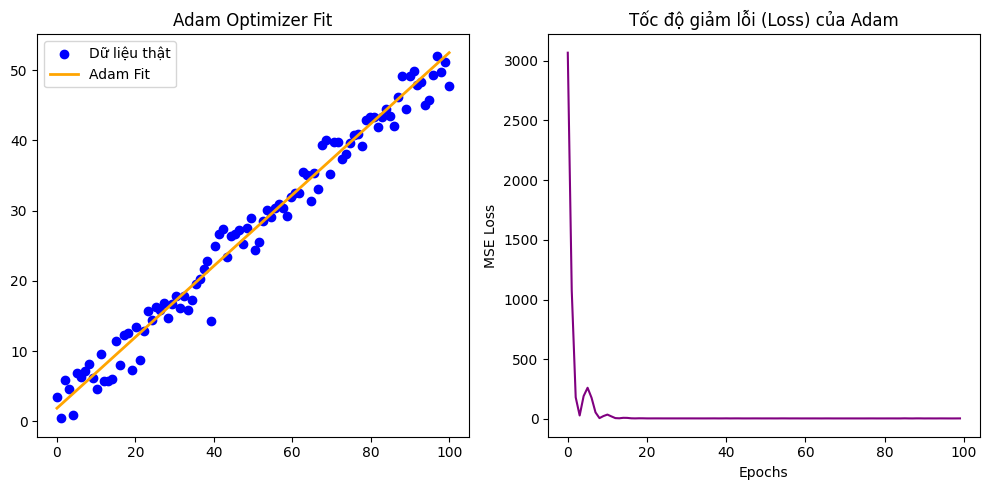

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

X = np.linspace(0, 100, 100)
true_w = 0.5
true_b = 2.0
y = (true_w * X + true_b) + np.random.normal(0, 2, 100)

print(f"Dữ liệu mẫu: X (min={X.min()}, max={X.max()})")

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])


# Adam kết hợp cả Momentum (beta_1) và RMSprop (beta_2)
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.1,  # Tốc độ học
    beta_1=0.9,         # Hệ số cho Momentum (Quán tính)
    beta_2=0.999,       # Hệ số cho RMSprop (Bình phương gradient)
    epsilon=1e-07,      # Số nhỏ chống chia cho 0
    amsgrad=False       # Biến thể AMSGrad (thường là False)
)

model.compile(optimizer=optimizer, loss='mean_squared_error')

print("Đang training với Adam...")
history = model.fit(X, y, epochs=100, verbose=0)

weights = model.layers[0].get_weights()
w_pred = weights[0][0][0]
b_pred = weights[1][0]

print("\nresults")
print(f"Công thức gốc:      y = {true_w}x + {true_b}")
print(f"Model dự đoán:      y = {w_pred:.4f}x + {b_pred:.4f}")


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y, label='Dữ liệu thật', color='blue')
plt.plot(X, w_pred * X + b_pred, color='orange', label='Adam Fit', linewidth=2)
plt.title("Adam Optimizer Fit")
plt.legend()

#Tốc độ hội tụ
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='purple')
plt.title("Tốc độ giảm lỗi (Loss) của Adam")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")

plt.tight_layout()
plt.show()